<a href="https://colab.research.google.com/github/NidaNabi/performance-ratio-evaluation/blob/main/pR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.patches as mpatches
from statistics import mean
import seaborn as sns

**Importing the dataset**

In [ ]:
df = '/content/Assignment_Dataset.xlsx'
df = pd.read_excel("Assignment_Dataset.xlsx")

**Exploring the data**

In [ ]:
df.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [ ]:
df.dtypes

Date    datetime64[ns]
GHI            float64
PR             float64
dtype: object

In [ ]:
df.shape

(982, 3)

In [ ]:
x=list(df['Date'])
y=list(df['PR'])

**Calculate a rolling 30-day moving average for the 'PR' column and store it in a new column named '30mva' in the DataFrame.**

In [ ]:
df['30mva'] = df['PR'].rolling(30).mean()

**This section defines conditions based on the values in the 'GHI' column and assigns corresponding colors to a new column named 'ColorCoding'**

In [ ]:
cs = [
    (df['GHI'] <= 2),
    (df['GHI'] > 2) & (df['GHI'] <= 4),
    (df['GHI'] > 4) & (df['GHI'] <= 6),
    (df['GHI'] > 6)
    ]
csss = ['blue', 'skyblue', 'orange', 'brown']


df['ColorCoding'] = np.select(cs, csss)


**Conditions used for creating a new column 'BLine' in the DataFrame.**

In [ ]:
conditions = [
    (dt.datetime(2019, 7, 1) <= df['Date']) & (df['Date'] < dt.datetime(2020, 7, 1)),
    (dt.datetime(2020, 7, 1) <= df['Date']) & (df['Date'] < dt.datetime(2021, 7, 1)),
    (dt.datetime(2021, 7, 1) <= df['Date']) & (df['Date'] < dt.datetime(2022, 7, 1)),
]
values = [73.9, 73.3, 72.7]

df['BLine'] = np.select(conditions, values)

# Perform element-wise comparison using pandas or numpy
count = np.sum(df['PR'].values > df['BLine'].values)

print(count)

479


**Finding the averages**

In [ ]:
# Calculate average PR lifetime
average_lifetime = df['PR'].mean()

# Calculate average PR for different time periods
average_365d = df['PR'].rolling(window=365, min_periods=1).mean()
average_90d = df['PR'].rolling(window=90, min_periods=1).mean()
average_60d = df['PR'].rolling(window=60, min_periods=1).mean()
average_30d = df['PR'].rolling(window=30, min_periods=1).mean()
average_7d = df['PR'].rolling(window=7, min_periods=1).mean()

print("Average PR lifetime:", average_lifetime)
print("Average PR last 365-d:", average_365d.iloc[-1])
print("Average PR last 90-d:", average_90d.iloc[-1])
print("Average PR last 60-d:", average_60d.iloc[-1])
print("Average PR last 30-d:", average_30d.iloc[-1])
print("Average PR last 7-d:", average_7d.iloc[-1])

Average PR lifetime: 72.73386933146641
Average PR last 365-d: 72.8832529999178
Average PR last 90-d: 73.05061490655557
Average PR last 60-d: 73.009263965
Average PR last 30-d: 71.85599481666667
Average PR last 7-d: 73.8036617242857


**Scatter plot for data visualization**

**Using MATPLOTLIB**

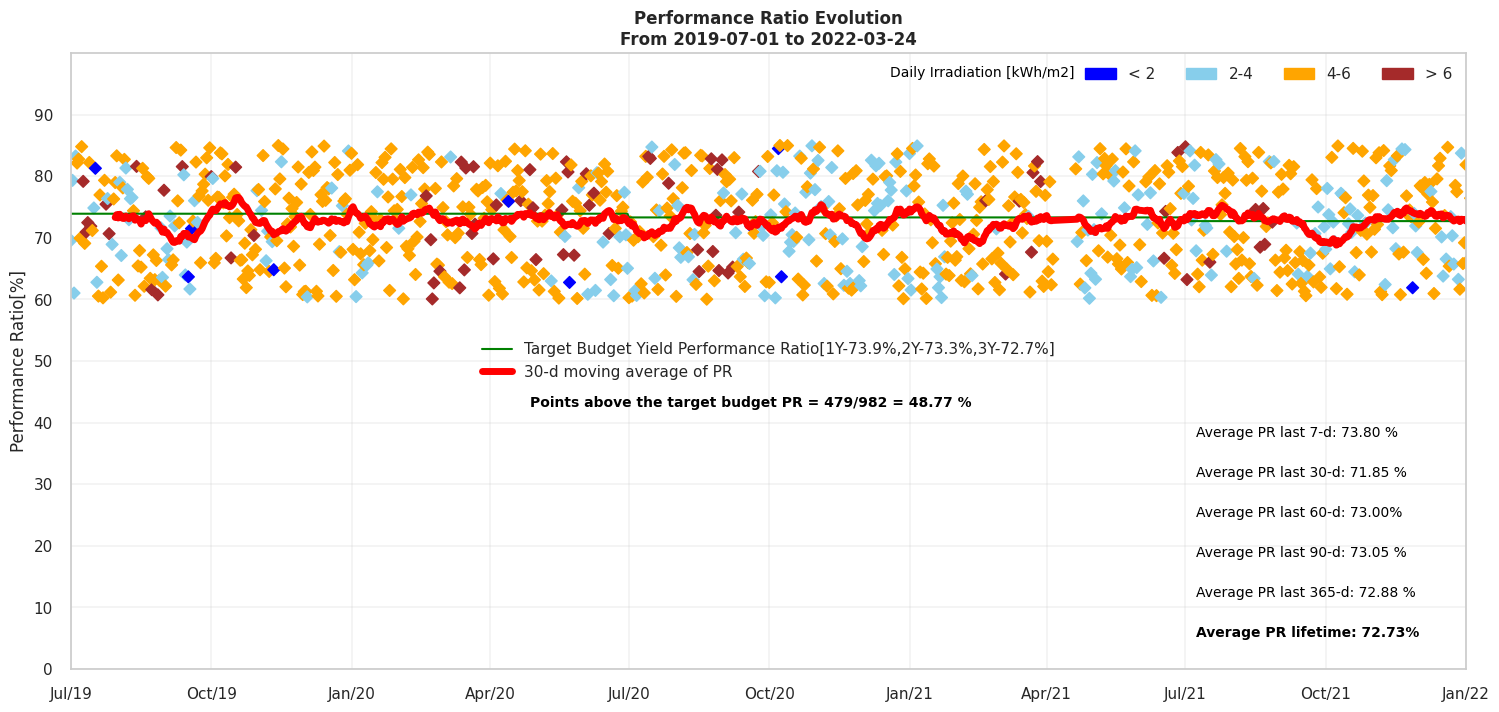

In [ ]:

fig, ax = plt.subplots(figsize=(18, 8))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.set_xlim([dt.date(2019, 7, 1), dt.date(2022, 1,1)])
ax.set_ylim(bottom=0,top=100)

plt.ylabel("Performance Ratio[%]")
plt.title("Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24",weight="bold")
plt.grid(linewidth=0.3)

blue_ = mpatches.Patch(color='blue', label='< 2')
lightblue_ = mpatches.Patch(color='skyblue', label='2-4')
orange_= mpatches.Patch(color='orange', label='4-6')
brown_= mpatches.Patch(color='brown', label='> 6')

first_legend=plt.legend(handles=[blue_,lightblue_,orange_,brown_],  loc=1, ncol=4 )

scatter=ax.scatter(x, y,c=df['ColorCoding'],marker="D")

z=df['30mva']
plt.yticks(np.arange(0, 100, step=10))
budgetline=df['BLine']

ax.plot(x,budgetline,color='green',label='Target Budget Yield Performance Ratio[1Y-73.9%,2Y-73.3%,3Y-72.7%]')
ax.plot(x,z,color='red', linewidth=5,label='30-d moving average of PR')

fig.text(0.58, 0.85,
         'Daily Irradiation [kWh/m2]',
         style = 'normal',
         fontsize = 10,
         color = "black",
         )
fig.text(0.38, 0.438,
         'Points above the target budget PR = 479/982 = 48.77 %',
         style = 'normal',
         fontsize = 10,
         color = "black",
         weight="bold")

fig.text(0.75, 0.15,
         'Average PR lifetime: 72.73%',
         style = 'normal',
         fontsize = 10,
         color = "black",
         weight="bold")

fig.text(0.75, 0.2,
         'Average PR last 365-d: 72.88 %',
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.25,
         'Average PR last 90-d: 73.05 %',
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.3,
         'Average PR last 60-d: 73.00%',
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.35,
         'Average PR last 30-d: 71.85 %',
         style = 'normal',
         fontsize = 10,
         color = "black")

fig.text(0.75, 0.4,
         'Average PR last 7-d: 73.80 %',
         style = 'normal',
         fontsize = 10,
         color = "black")

ax.legend(loc="center")
plt.gca().add_artist(first_legend)

**USING SEABORN**

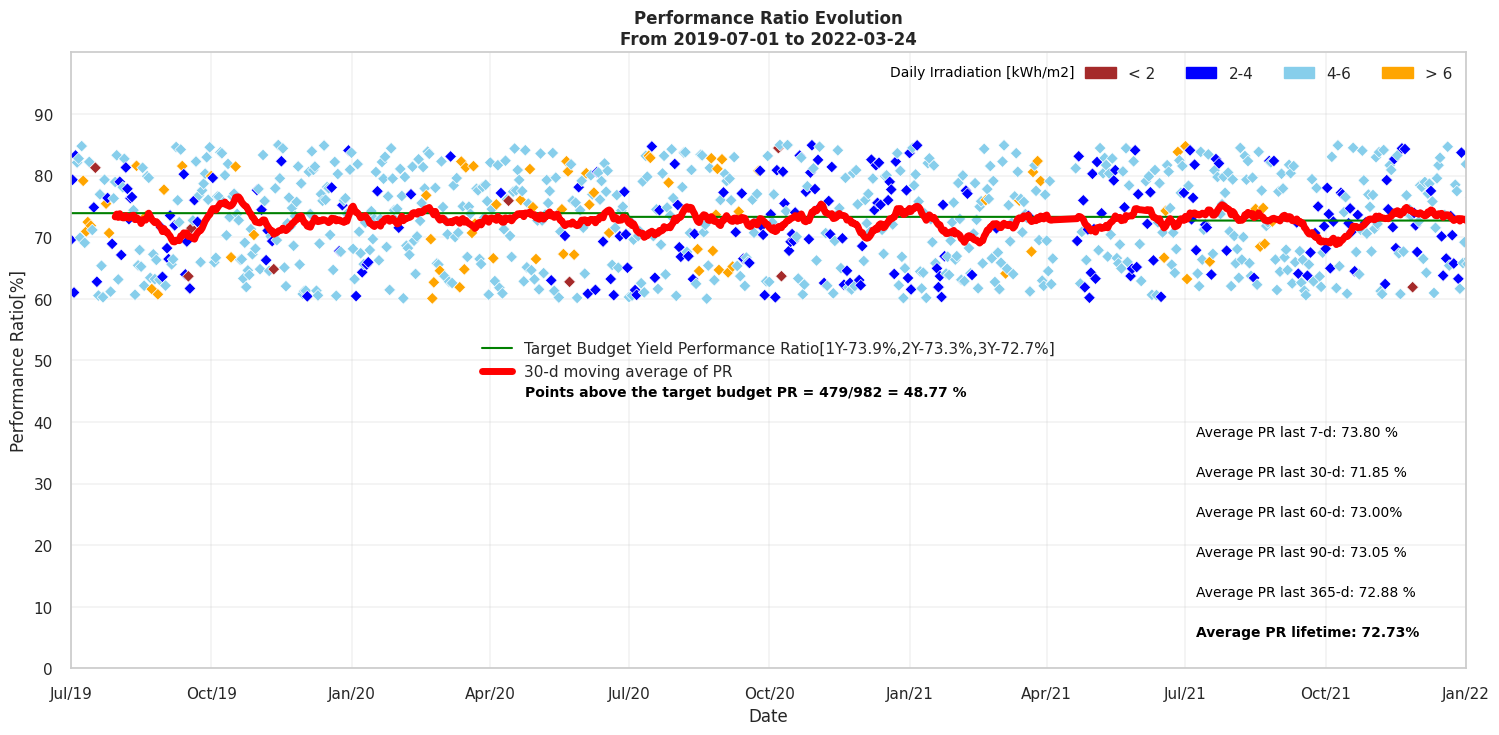

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18, 8))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.set_xlim([dt.date(2019, 7, 1), dt.date(2022, 1, 1)])
ax.set_ylim(bottom=0, top=100)

plt.ylabel("Performance Ratio[%]")
plt.title("Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24", weight="bold")
plt.grid(linewidth=0.3)

# Define colors for the legend
colors_legend = {
    '< 2': 'brown',
    '2-4': 'blue',
    '4-6': 'skyblue',
    '> 6': 'orange'
}

color_legend_handles = [mpatches.Patch(color=mcolors.CSS4_COLORS[color], label=label) for label, color in colors_legend.items()]
first_legend = plt.legend(handles=color_legend_handles, loc=1, ncol=4)
plt.gca().add_artist(first_legend)


scatter = sns.scatterplot(data=df, x='Date', y='PR', hue='ColorCoding', legend=False,palette=['blue', 'skyblue', 'orange', 'brown'], marker='D')

z = df['30mva']
plt.yticks(np.arange(0, 100, step=10))
budgetline = df['BLine']

ax.plot(x, budgetline, color='green', label='Target Budget Yield Performance Ratio[1Y-73.9%,2Y-73.3%,3Y-72.7%]')
ax.plot(x, z, color='red', linewidth=5, label='30-d moving average of PR')

fig.text(0.58, 0.85, 'Daily Irradiation [kWh/m2]', style='normal', fontsize=10, color="black")
fig.text(0.377, 0.45, 'Points above the target budget PR = 479/982 = 48.77 %', style='normal', fontsize=10, color="black", weight="bold")

fig.text(0.75, 0.15, 'Average PR lifetime: 72.73%', style='normal', fontsize=10, color="black", weight="bold")
fig.text(0.75, 0.2, 'Average PR last 365-d: 72.88 %', style='normal', fontsize=10, color="black")
fig.text(0.75, 0.25, 'Average PR last 90-d: 73.05 %', style='normal', fontsize=10, color="black")
fig.text(0.75, 0.3, 'Average PR last 60-d: 73.00%', style='normal', fontsize=10, color="black")
fig.text(0.75, 0.35, 'Average PR last 30-d: 71.85 %', style='normal', fontsize=10, color="black")
fig.text(0.75, 0.4, 'Average PR last 7-d: 73.80 %', style='normal', fontsize=10, color="black")

ax.legend(loc="center")
#plt.gca().add_artist(first_legend)

plt.show()
